## Графовая рекомендательная система для музыки

Данные:
https://www.kaggle.com/datasets/pcbreviglieri/lastfm-music-artist-scrobbles

In [3]:
import numpy as np
import pandas as pd
from scipy import sparse
from sklearn.preprocessing import normalize

In [4]:
interactions_df = pd.read_csv('lastfm_user_scrobbles.csv')
titles_df = pd.read_csv('lastfm_artist_list.csv')

In [5]:
interactions_df

,user_id,artist_id,scrobbles
0,1,4562,13883
1,1,10191,11690
2,1,494,11351
3,1,6673,10300
4,1,8402,8983
...,...,...,...
92787,1892,10098,278
92788,1892,8660,263
92789,1892,3274,258
92790,1892,4240,232


In [6]:
titles_df

,artist_id,artist_name
0,1,__Max__
1,2,_Algol_
2,3,-123 Min.
3,4,-Oz-
4,5,-T De Sangre
...,...,...
17488,17489,鷺巣詩郎
17489,17490,黃立行
17490,17491,黄义达
17491,17492,黒木メイサ


Проверим количество взаимодействий пользователей, нет ли там аномальных значений

In [10]:
interactions_df.groupby('user_id').count().value_counts()

artist_id  scrobbles
50         50           1790
49         49             40
1          1               8
4          4               5
43         43              3
48         48              3
10         10              3
14         14              3
33         33              2
32         32              2
37         37              2
38         38              2
41         41              2
34         34              2
15         15              2
12         12              2
11         11              2
36         36              1
42         42              1
40         40              1
46         46              1
3          3               1
44         44              1
30         30              1
35         35              1
5          5               1
2          2               1
27         27              1
25         25              1
22         22              1
21         21              1
18         18              1
13         13              1
9          9          

In [11]:
interactions_df.groupby('user_id').count().mean()

artist_id    49.044397
scrobbles    49.044397
dtype: float64

### Создание графа

Сделаем словарь artist_id	artist_name

In [12]:
titles_df.index = titles_df['artist_id']
titles_dict = titles_df['artist_name'].to_dict()

In [18]:
titles_dict

{1: '__Max__',
 2: '_Algol_',
 3: '-123 Min.',
 4: '-Oz-',
 5: '-T De Sangre',
 6: ':(',
 7: ':Wumpscut:',
 8: '!!!',
 9: '!Deladap',
 10: '!Distain',
 11: '¡Forward',
 12: '...And The Earth Swarmed With Them',
 13: '...And You Will Know Us By The Trail Of Dead',
 14: '.38 Special',
 15: '.Crrust',
 16: '“V–Е',
 17: '(1962-1966)',
 18: '(Hed) Planet Earth',
 19: '(Pre) Kingdom',
 20: '(Sic)Monic',
 21: '(We Are) Performance',
 22: '[:Sitd:]',
 23: '[Br]Om',
 24: '[Re:Jazz]',
 25: '[Spunge]',
 26: '{{{Sunset}}}',
 27: '{F.B.R}',
 28: '*Nsync',
 29: '\\Eminem F_ Rihanna',
 30: '#####',
 31: '#2 Orchestra',
 32: '†‡†',
 33: '℃-Ute',
 34: '+\\-',
 35: '$Lick',
 36: '$Lick Feat. Six-Fo',
 37: '06 Children Of The Cross',
 38: '1-800-Zombie',
 39: '10 Years',
 40: '10-20 Без Выходных',
 41: '100 Bitches',
 42: '1000names',
 43: '100blumen',
 44: '100dbs',
 45: '100deadrabbits!!!',
 46: '10cc',
 47: '11.43',
 48: '110',
 49: '112',
 50: '1125',
 51: '12 Rounds',
 52: '12 Stones',
 53: '120 Day

Сделаем матрицу user - item

In [25]:
rows, r_pos = np.unique(interactions_df.values[:,0], return_inverse=True)
cols, c_pos = np.unique(interactions_df.values[:,1], return_inverse=True)

In [37]:
interactions_sparse = sparse.csr_matrix((interactions_df.values[:,2], (r_pos, c_pos)))

In [38]:
interactions_sparse

<1892x17493 sparse matrix of type '<class 'numpy.int64'>'
	with 92723 stored elements in Compressed Sparse Row format>

Нормализуем и получаем матрицу похожести

In [41]:
Pui = normalize(interactions_sparse, norm='l2', axis=1)
sim = Pui.T * Pui

In [42]:
# косинусная близость
sim.todense()

matrix([[0.00120405, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.00258841, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.00383689, ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.0228355 , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.00827076,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.0010429 ]])

In [63]:
titles_df[titles_df['artist_name'] == 'Lady Gaga']

,artist_id,artist_name
artist_id,,
8460,8460,Lady Gaga


In [51]:
# Проверяем адекватность
Nirvana = 10734
[titles_dict[i+1] for i in sim[Nirvana].toarray().argsort()[0][-20:]]

['The Doors',
 'Pink Floyd',
 'Joy Division',
 'Depeche Mode',
 'Marilyn Manson',
 'Paramore',
 'System Of A Down',
 'Arctic Monkeys',
 'Pearl Jam',
 'Green Day',
 'Foo Fighters',
 'Muse',
 'Alice In Chains',
 'Red Hot Chili Peppers',
 'Placebo',
 'The Smashing Pumpkins',
 'Metallica',
 'Radiohead',
 'The Beatles',
 'Nirvana']

In [53]:
A_Perfect_Circle = 203
[titles_dict[i+1] for i in sim[A_Perfect_Circle].toarray().argsort()[0][-20:]]

['The Smashing Pumpkins',
 'Depeche Mode',
 'Opeth',
 'Deftones',
 'Queens Of The Stone Age',
 'Linkin Park',
 'Incubus',
 'The National',
 'Three Days Grace',
 'Placebo',
 'Weezer',
 'Pink Floyd',
 'Metallica',
 'Porcupine Tree',
 'Muse',
 'Radiohead',
 'Pearl Jam',
 'Nine Inch Nails',
 'Tool',
 'A Perfect Circle']

In [64]:
Lady_gaga = 8459
[titles_dict[i+1] for i in sim[Lady_gaga].toarray().argsort()[0][-20:]]

['Kelly Clarkson',
 'The Pretty Reckless',
 'P!Nk',
 'Black Eyed Peas',
 'Mariah Carey',
 'Shakira',
 'Taylor Swift',
 'Miley Cyrus',
 'Paramore',
 'Avril Lavigne',
 'Glee Cast',
 'Kylie Minogue',
 'Beyonce',
 'Ke$Ha',
 'Madonna',
 'Katy Perry',
 'Christina Aguilera',
 'Rihanna',
 'Britney Spears',
 'Lady Gaga']

In [65]:
# Делаем предсказания для пользователей
interactions_sparse_transposed = interactions_sparse.transpose(copy=True)
Piu = normalize(interactions_sparse_transposed, norm='l2', axis=1)

fit = Pui * Piu * Pui

In [67]:
fit.shape

(1892, 17493)

Проверим, с каких групп мы начали для пользователя 520, затем проверим, какие группы добавились в рекомендации

In [78]:
init_set = set([titles_dict[i+1] for i in np.nonzero(interactions_sparse[22])[1].tolist()])
init_set

{'*Nsync',
 'Alexandra Burke',
 'Ashlee Simpson',
 'Ashley Tisdale',
 'Atomic Kitten',
 'Backstreet Boys',
 'Beyonce',
 'Blue',
 'Britney Spears',
 'Carter Burwell',
 'Cheryl Cole',
 'Christina Aguilera',
 'Ciara',
 'Danity Kane',
 'David Guetta',
 'Delta Goodrem',
 "Destiny's Child",
 'Girls Aloud',
 'Hilary Duff',
 'John Williams',
 'Jordin Sparks',
 'Justin Timberlake',
 'Kanye West',
 'Kat Deluna',
 'Kylie Minogue',
 'Lady Gaga',
 'Leona Lewis',
 'M. Pokora',
 'Madonna',
 'Mandy Moore',
 'Medina',
 'Michael Jackson',
 'Monrose',
 'Natasha Bedingfield',
 'Ne-Yo',
 'Nelly Furtado',
 'Nick Carter',
 'Nicole Scherzinger',
 'P!Nk',
 'Rachel Stevens',
 'Rihanna',
 'Robbie Williams',
 'Sarah Connor',
 'Shakira',
 'Sugababes',
 'Taio Cruz',
 'The Pussycat Dolls',
 'Timbaland',
 'Vanessa Hudgens',
 'Vanessa S.'}

In [79]:
pred_set = set([titles_dict[i+1] for i in fit[22].toarray().argsort()[0][-70:].tolist()])
pred_set

{'Adam Lambert',
 'Alanis Morissette',
 'Alicia Keys',
 'Aly & Aj',
 'Ashlee Simpson',
 'Ashley Tisdale',
 'Avril Lavigne',
 'Backstreet Boys',
 'Beyonce',
 'Black Eyed Peas',
 'Brandy',
 'Britney Spears',
 'Carrie Underwood',
 'Celine Dion',
 'Cheryl Cole',
 'Christina Aguilera',
 'Ciara',
 'David Archuleta',
 'David Guetta',
 'Demi Lovato',
 'Depeche Mode',
 'Eminem',
 'Enrique Iglesias',
 'Evanescence',
 'Girls Aloud',
 'Glee Cast',
 'Gwen Stefani',
 'Hilary Duff',
 'Janet Jackson',
 'Jennifer Lopez',
 'Jesse Mccartney',
 'Jessica Simpson',
 'Jordin Sparks',
 'Justin Timberlake',
 'Katy Perry',
 'Ke$Ha',
 'Kelly Clarkson',
 'Kylie Minogue',
 'Lady Gaga',
 'Leona Lewis',
 'Lily Allen',
 'Lindsay Lohan',
 'Linkin Park',
 'M. Pokora',
 'Madonna',
 'Mandy Moore',
 'Mariah Carey',
 'Michael Jackson',
 'Miley Cyrus',
 'Monrose',
 'Muse',
 'Natasha Bedingfield',
 'Nelly Furtado',
 'Nicole Scherzinger',
 'P!Nk',
 'Paramore',
 'Rihanna',
 'Robbie Williams',
 'Robyn',
 'Selena Gomez & The Sce

In [80]:
pred_set - init_set

{'Adam Lambert',
 'Alanis Morissette',
 'Alicia Keys',
 'Aly & Aj',
 'Avril Lavigne',
 'Black Eyed Peas',
 'Brandy',
 'Carrie Underwood',
 'Celine Dion',
 'David Archuleta',
 'Demi Lovato',
 'Depeche Mode',
 'Eminem',
 'Enrique Iglesias',
 'Evanescence',
 'Glee Cast',
 'Gwen Stefani',
 'Janet Jackson',
 'Jennifer Lopez',
 'Jesse Mccartney',
 'Jessica Simpson',
 'Katy Perry',
 'Ke$Ha',
 'Kelly Clarkson',
 'Lily Allen',
 'Lindsay Lohan',
 'Linkin Park',
 'Mariah Carey',
 'Miley Cyrus',
 'Muse',
 'Paramore',
 'Robyn',
 'Selena Gomez & The Scene',
 'Spice Girls',
 'Taylor Swift',
 'The Saturdays',
 'The Veronicas',
 'Wanessa',
 '倖田來未'}

##  Получилось неплохо)

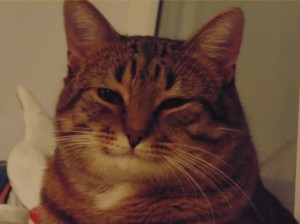